# Homework 3
Natalia Ramirez Jimenez

In [40]:
## Standard Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# turn off future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)  

## Question 1

In [41]:
# Reading data
sms = pd.read_csv("https://remiller1450.github.io/data/sms_spam.txt", sep='\t', names=['Label','Message'])
sms.head(5)

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [42]:
# Inspecting the messages labeled as spam
sms[sms['Label']=='spam'].sample(5)['Message'].values

array(["FreeMsg: Hey - I'm Buffy. 25 and love to satisfy men. Home alone feeling randy. Reply 2 C my PIX! QlynnBV Help08700621170150p a msg Send stop to stop txts",
       'Ur cash-balance is currently 500 pounds - to maximize ur cash-in now send GO to 86688 only 150p/msg. CC 08718720201 HG/Suite342/2Lands Row/W1J6HL',
       'This message is free. Welcome to the new & improved Sex & Dogging club! To unsubscribe from this service reply STOP. msgs@150p 18+only',
       'URGENT!! Your 4* Costa Del Sol Holiday or £5000 await collection. Call 09050090044 Now toClaim. SAE, TC s, POBox334, Stockport, SK38xh, Cost£1.50/pm, Max10mins',
       'You have an important customer service announcement from PREMIER.'],
      dtype=object)

From the above set of messages we can identify that `spam` emails tend to display a higher amount of numbers, symbols, and capital letters. We will use these three features to predict spam messages.

In [43]:
from sklearn.model_selection import train_test_split
# Splitting data
train_sms, test_sms = train_test_split(sms, test_size=0.2, random_state=8)

## Separate outcome from message
train_sms_y = (train_sms['Label'] == 'spam').astype(int)
train_sms_X = train_sms['Message']

In [44]:
import re
#Setting up functions to identify the selected features in percentage form
def get_num(text):
    return sum(map(str.isdigit, text))/len(text)

def get_capital(text):
    return len(re.findall(r'[A-Z]', text))/len(text)

symbols='#!/\$%?&*()_+-^[]{|}><~;:.,»«@£="'+"'"
def get_symbol(text):
    return sum([char_ in symbols for char_ in text])/len(text)

def first_word(text):
    return text.split(sep=' ')[0].lower().replace('!','')

In [45]:
## Create a dictonary and convert to a Pandas dataframe
d = {'numeric': train_sms_X.apply(get_num), 'num_capital': train_sms_X.apply(get_capital), 'num_symbol': train_sms_X.apply(get_symbol), 'first_word': train_sms_X.apply(first_word)}
features_spam = pd.DataFrame(d)
features_spam['classification'] = train_sms_y
features_spam[features_spam['classification'] == 1].head(15)

,numeric,num_capital,num_symbol,first_word,classification
684,0.088608,0.094937,0.056962,hi,1
2663,0.000000,0.015385,0.023077,hello,1
3999,0.097902,0.118881,0.000000,we,1
2003,0.000000,0.062937,0.048951,themob>yo,1
5547,0.012500,0.125000,0.050000,had,1
159,0.088710,0.040323,0.016129,customer,1
3174,0.000000,0.070175,0.114035,dear,1
752,0.000000,0.123077,0.015385,you,1
2881,0.118421,0.151316,0.072368,last,1
527,0.151899,0.088608,0.075949,today's,1


In [46]:
from pandas import get_dummies
# Encoding the categorical column
train_X_encoded = get_dummies(features_spam[['first_word', 'numeric', 'num_capital', 'num_symbol','classification']], columns=['first_word'])
spam = train_X_encoded[['first_word_urgent', 'first_word_free','numeric', 'num_capital', 'num_symbol','classification']]

In [47]:
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
## Set up training data for spam
train_spam, test_spam = train_test_split(spam, test_size=0.2, random_state=5)
train_spam_y = train_spam['classification']
train_spam_X = train_spam.drop('classification', axis = 1)
test_spam_y = test_spam['classification']
test_spam_X = test_spam.drop('classification', axis = 1)

pipeline_svm = Pipeline([('model', SVC())])

params_svm = {'model__kernel': ['poly','linear','rbf'],
              'model__C': [0.1,0.2,0.5]
              }

grid_svm = GridSearchCV(pipeline_svm, param_grid=params_svm, cv=4, scoring = 'f1').fit(train_spam_X, train_spam_y)
print(grid_svm.best_estimator_)

kernel = grid_svm.best_estimator_.named_steps['model'].kernel
best_C = grid_svm.best_estimator_.named_steps['model'].C

print(f'Best kernel: {kernel}')
print(f'Best C: {best_C}')
print(f'Best score: {grid_svm.best_score_}')

Pipeline(steps=[('model', SVC(C=0.5))])
Best kernel: rbf
Best C: 0.5
Best score: 0.8747937396827828


In [48]:
# Trying new values for C
# Selected best model
params_svm = {
            'model__kernel': ['poly','linear','rbf'],
            'model__C': [0.5, 0.7, 1, 2]}
grid_svm = GridSearchCV(pipeline_svm, param_grid=params_svm, cv=4, scoring = 'f1').fit(train_spam_X, train_spam_y)
print(grid_svm.best_estimator_)

kernel = grid_svm.best_estimator_.named_steps['model'].kernel
best_C = grid_svm.best_estimator_.named_steps['model'].C

print(f'Best kernel: {kernel}')
print(f'Best C: {best_C}')
print(f'Best score: {grid_svm.best_score_}')

Pipeline(steps=[('model', SVC(C=2))])
Best kernel: rbf
Best C: 2
Best score: 0.8804783581721448


In [49]:
from sklearn.model_selection import cross_val_score
# Fitting and checking accuracy in the test set
f1_svc = cross_val_score(grid_svm.best_estimator_, test_spam_X, test_spam_y, cv=5, scoring='f1')
print(f'F1 of SVC in test: {f1_svc.mean()}')

F1 of SVC in test: 0.865827937095282


In [50]:
# Create a Voting Classifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Creating an ensemble
# Defining the individual models
model1 = Pipeline([('model',SVC())])
model2 = DecisionTreeClassifier(max_depth=6)
model3 = Pipeline([('model', KNeighborsClassifier())])
                  
## Create the ensemble
my_ensemble = VotingClassifier(estimators=[('svm', model1),('tree', model2),('knn', model3)], voting='hard')

## Pipeline to compare models 
model_pipe = Pipeline([('model', SVC())])
candidate_models = {'model': [my_ensemble, model1, model2, model3]}

## Cross-validated ROC AUC scores
grid_models = GridSearchCV(model_pipe, candidate_models, cv=5, scoring = 'f1').fit(train_spam_X, train_spam_y)
pd.DataFrame(grid_models.cv_results_).sort_values('mean_test_score', ascending=False)[['param_model', 'mean_test_score']]


,param_model,mean_test_score
3,(KNeighborsClassifier()),0.894813
0,"VotingClassifier(estimators=[('svm', Pipeline(...",0.893565
2,DecisionTreeClassifier(max_depth=6),0.878753
1,(SVC()),0.872153


In [51]:
 #Fitting and checking accuracy in the test set
f1_ensemble = cross_val_score(grid_models.best_estimator_, test_spam_X, test_spam_y, cv=5, scoring='f1')
print(f'F1 of best ensemble in test: {f1_ensemble.mean()}')

F1 of best ensemble in test: 0.8568285142753227


### Best Model:

In [52]:
best_model = grid_models.best_estimator_
print(f'Best model: {best_model}')
f1_best = cross_val_score(best_model, test_spam_X, test_spam_y, cv=5, scoring='f1')
print(f'F1 of best model in test: {f1_best.mean()}')

Best model: Pipeline(steps=[('model', Pipeline(steps=[('model', KNeighborsClassifier())]))])
F1 of best model in test: 0.8568285142753227


### Methods
First, the data is read and explored by displaying its head along with some example "spam" messages.
After close inspection of example spam emails we can note that these messages have a greater amount of digits, capital letters, and symbols. Moreover, the word *"urgent"* is the most common first word in spam messages. Thus, I created four functions to identify the selected features in the form of percentage on the analyzed message. Because the column `first_word` is categorical and has text features I decided to One Hot encode it. Using these features I created a new data set and split it into `train` and `test`. 

For the predictive models I decided to utilize a Support Vector Machine and an ensemble with `SVC`, `DecisionTreeClassifier`, and `KNeighborsClassifier`. Through a cross-validated grid search I identified a higher F1 score the model returned by the ensemble with a score of $0.89$ for the train set and a score of $0.87$ for the test set.

## Question 2

In [53]:
# Reading and exploring dataset
driving = pd.read_csv("https://remiller1450.github.io/data/drugdetection.csv")
driving.info()
driving.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608400 entries, 0 to 608399
Data columns (total 10 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              608400 non-null  int64  
 1   Full_Sample_ID                  608400 non-null  object 
 2   DosingLevel                     608400 non-null  object 
 3   Target                          608400 non-null  int64  
 4   CFS.Brake.Pedal.Force           608400 non-null  float64
 5   CFS.Accelerator.Pedal.Position  608400 non-null  float64
 6   CFS.Steering.Wheel.Angle        608400 non-null  float64
 7   CFS.Steering.Wheel.Angle.Rate   608400 non-null  float64
 8   SCC.Lane.Deviation.2            608400 non-null  float64
 9   VDS.Veh.Speed                   608400 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 46.4+ MB


,ID,Full_Sample_ID,DosingLevel,Target,CFS.Brake.Pedal.Force,CFS.Accelerator.Pedal.Position,CFS.Steering.Wheel.Angle,CFS.Steering.Wheel.Angle.Rate,SCC.Lane.Deviation.2,VDS.Veh.Speed
0,34,34_1_YM,YM,1,0.030653,0.383080,2.021470,3.345467,-5.376608,71.282471
1,34,34_1_YM,YM,1,-0.007314,0.385061,2.109360,3.961737,-5.422563,71.281548
2,34,34_1_YM,YM,1,-0.007314,0.386401,2.153305,3.961737,-5.469440,71.281052
3,34,34_1_YM,YM,1,0.002178,0.387513,2.197250,4.049776,-5.517264,71.280991
4,34,34_1_YM,YM,1,0.011669,0.388236,2.285140,3.521544,-5.564104,71.281364


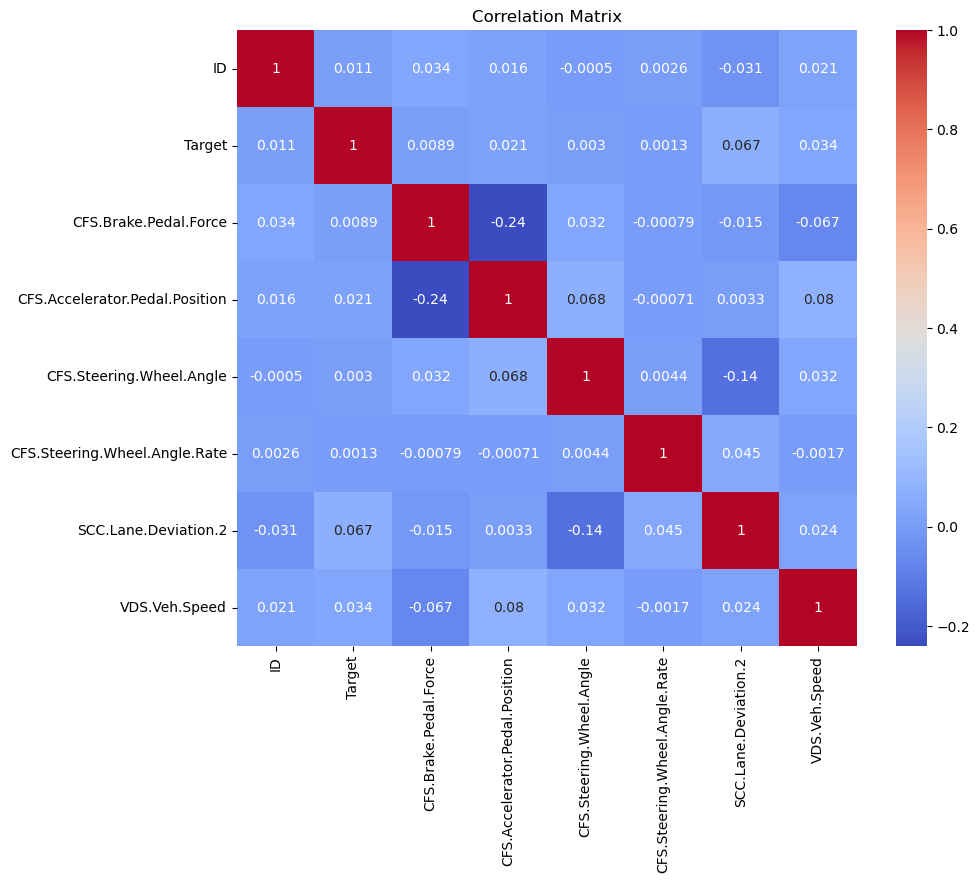

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create correlation matrix
corr_matrix = driving.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [55]:
# Rearranging data
my_vars = ['CFS.Accelerator.Pedal.Position', 'CFS.Steering.Wheel.Angle.Rate', 'VDS.Veh.Speed']
train_X_G = pd.concat([driving.groupby('Full_Sample_ID')[my_vars].mean(),
                        driving.groupby('Full_Sample_ID')[my_vars].std()], axis=1)
train_X_G.columns = ['Mean_Position', 'Mean_Angle_Rate', 'Mean_Speed', 'SD_Position', 'SD_Angle_Rate', 'SD_Speed']

# Grouping by Full Sample ID and getting the first label per group
train_y_p = driving.groupby('Full_Sample_ID').first()
train_y_G = train_y_p['Target']
train_X_G['Target'] = train_y_G
train_driving, test_driving = train_test_split(train_X_G, test_size=0.2, random_state=5)
train_driving.head()

,Mean_Position,Mean_Angle_Rate,Mean_Speed,SD_Position,SD_Angle_Rate,SD_Speed,Target
Full_Sample_ID,,,,,,,
26_3_ZM,0.407955,0.160108,69.779937,0.251274,7.311205,4.466093,1
3_1_XP,0.316936,0.420507,64.383093,0.157873,6.558829,4.774798,0
10_2_XP,0.325805,0.429457,67.404438,0.121302,2.866360,2.659039,0
3_1_YM,0.357649,0.253747,62.261777,0.250538,5.020827,10.468876,1
123_2_XP,0.426327,0.596413,71.048139,0.267812,6.814416,2.562071,0


In [56]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA


train_driving, test_driving = train_test_split(train_X_G, test_size=0.2, random_state=5)
train_driving_y = train_driving['Target']
train_driving_X = train_driving.drop('Target', axis = 1)
test_driving_y = test_driving['Target']
test_driving_X = test_driving.drop('Target', axis = 1)

pipeline_k =  Pipeline([
    ('model', KNeighborsClassifier())])

params_k = {'model__n_neighbors': [3,4,5,7,8], 
          'model__weights': ['distance','uniform'],
          'model__p': [1, 2]
         }

grid_k = GridSearchCV(pipeline_k, param_grid=params_k, cv=5, scoring = 'roc_auc').fit(train_driving_X, train_driving_y)
print(grid_k.best_estimator_)

n_neighbors = grid_k.best_estimator_.named_steps['model'].n_neighbors
weights = grid_k.best_estimator_.named_steps['model'].weights

print(f'Best n_neighbors: {n_neighbors}')
print(f'Best weights: {weights}')
print(f'Best score: {grid_k.best_score_}')

Pipeline(steps=[('model',
                 KNeighborsClassifier(n_neighbors=7, p=1, weights='distance'))])
Best n_neighbors: 7
Best weights: distance
Best score: 0.6906826434277414


In [57]:
# Fitting and checking accuracy in the test set
auc_k = cross_val_score(grid_k.best_estimator_, test_driving_X, test_driving_y, cv=5, scoring='roc_auc')
print(f'AUC of KNeighbors model in test: {auc_k.mean()}')

AUC of KNeighbors model in test: 0.6633333333333333


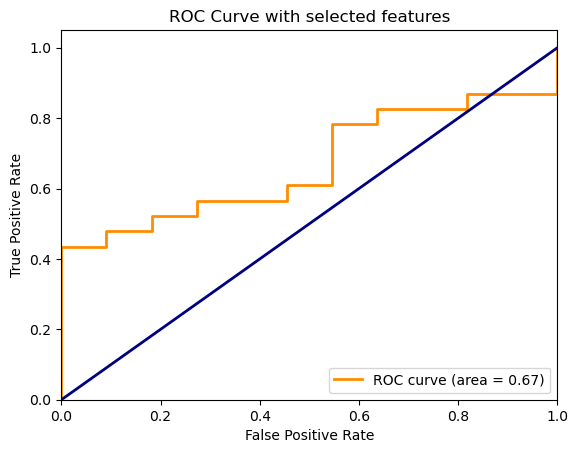

In [58]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict

test_y_pred_prob = cross_val_predict(estimator = grid_k.best_estimator_, X = test_driving_X, y = test_driving_y, cv = 5, method = 'predict_proba')

fpr, tpr, thresholds = roc_curve(test_driving_y, test_y_pred_prob[:,1], pos_label = 1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with selected features')
plt.legend(loc="lower right")
plt.show()

In [59]:
pipeline_svm = Pipeline([('scaler', StandardScaler()),
                         ('pca', PCA(n_components=2)),
                         ('model', SVC())])

params_svm = {'model__kernel': ['poly','linear','rbf'],
               'model__C': [0.5,0.8],
              }
grid_svm = GridSearchCV(pipeline_svm, param_grid=params_svm, cv=5, scoring = 'roc_auc').fit(train_driving_X, train_driving_y)
print(grid_svm.best_estimator_)

kernel = grid_svm.best_estimator_.named_steps['model'].kernel
best_C = grid_svm.best_estimator_.named_steps['model'].C

print(f'Best kernel: {kernel}')
print(f'Best C: {best_C}')
print(f'Best score: {grid_svm.best_score_}')

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('model', SVC(C=0.8, kernel='poly'))])
Best kernel: poly
Best C: 0.8
Best score: 0.6266085693536674


In [60]:
# Fitting and checking accuracy in the test set
auc_svm = cross_val_score(grid_svm.best_estimator_, test_driving_X, test_driving_y, cv=5, scoring='roc_auc')
print(f'AUC of SVC model in test: {auc_svm.mean()}')

AUC of SVC model in test: 0.625


In [61]:
## Defining the individual models
model1 = Pipeline([('model', SVC(kernel = 'poly', probability=True))])
model2 = DecisionTreeClassifier(max_depth=6)
model3 = Pipeline([('model', KNeighborsClassifier())])
                  
## Create the ensemble
my_ensemble = VotingClassifier(estimators=[('svm', model1),('tree', model2),('knn', model3)], voting='soft')

## Pipeline to compare models 
model_pipe = Pipeline([('model', SVC())])
candidate_models = {'model': [my_ensemble, model1, model2, model3]}

## Cross-validated ROC AUC scores
grid_models = GridSearchCV(model_pipe, candidate_models, cv=5, scoring = 'roc_auc').fit(train_driving_X, train_driving_y)
pd.DataFrame(grid_models.cv_results_).sort_values('mean_test_score', ascending=False)[['param_model', 'mean_test_score']]


,param_model,mean_test_score
3,(KNeighborsClassifier()),0.664263
0,"VotingClassifier(estimators=[('svm',\n ...",0.604023
2,DecisionTreeClassifier(max_depth=6),0.565592
1,"(SVC(kernel='poly', probability=True))",0.530458


In [62]:
## Some tuning parameters to search over
params = {'svm__model__kernel': ['poly','linear'], 
          'tree__max_depth': [3,4],
         'knn__model__n_neighbors': [4,5,7],
         'knn__model__weights': ['distance','uniform'],
         'voting': ['soft']}

## Perform the grid search
grid_voting = GridSearchCV(my_ensemble, param_grid=params, cv=5, scoring = 'roc_auc').fit(train_driving_X, train_driving_y)
print(grid_voting.best_estimator_)
print(grid_voting.best_score_)

VotingClassifier(estimators=[('svm',
                              Pipeline(steps=[('model',
                                               SVC(kernel='poly',
                                                   probability=True))])),
                             ('tree', DecisionTreeClassifier(max_depth=4)),
                             ('knn',
                              Pipeline(steps=[('model',
                                               KNeighborsClassifier(n_neighbors=7))]))],
                 voting='soft')
0.6290777051561365


In [63]:
auc_svm = cross_val_score(grid_voting.best_estimator_, test_driving_X, test_driving_y, cv=5, scoring='roc_auc')
print(f'AUC of Best Ensemble in test: {auc_svm.mean()}')

AUC of Best Ensemble in test: 0.49000000000000005


In [64]:
## Set up the base estimators (model1 - model3 defined previously)
my_base_models = my_base_models = [('svm', model1), ('tree', model2), ('knn', model3)]

## Set up the final estimator
my_final_model = DecisionTreeClassifier(max_depth=2)

## Create the stack
from sklearn.ensemble import StackingClassifier
my_stack = StackingClassifier(estimators = my_base_models, 
                              final_estimator = my_final_model, 
                              stack_method ='predict_proba', cv=5)

## Fit and Evaluate (note that CV is done internally in StackingClassifier)
fitted_stack = my_stack.fit(train_driving_X, train_driving_y)
cv_stacked_preds = fitted_stack.predict(test_driving_X)

from sklearn.metrics import roc_auc_score
print(roc_auc_score(test_driving_y, cv_stacked_preds))

0.5691699604743082


### Best model

In [65]:
best_model = grid_k.best_estimator_
print(f'Best model: {best_model}')
f1_best = cross_val_score(best_model, train_driving_X, train_driving_y, cv=5, scoring='roc_auc')
print(f'ROC AUC of best model in test: {f1_best.mean()}')

Best model: Pipeline(steps=[('model',
                 KNeighborsClassifier(n_neighbors=7, p=1, weights='distance'))])
ROC AUC of best model in test: 0.6906826434277414


### Methods

First, the head of the data is displayed along with a correlation matrix that showcases how each column on the original dataset is related. After analyzing the correlations I decided to choose features that were not too closely related, as we would like to get different information about the driver from our selected estimators. 

The columns `CFS.Accelerator.Pedal.Position`, `CFS.Steering.Wheel.Angle.Rate`, `VDS.Veh.Speed` were chosen as estimators. Then group the data based on `Full_Sample_ID` and getting the `.mean()` and `.std()` from the selected features, creating a new data frame that was then split into test and train sets.

The predictive models used are:
1. A KNeighborsClassifier.
2. An SVC model with previous PCA to reduce some of the correlations between variables.
3. A Voting Classifier with an ensemble using SVC, KNNeighbors, and Tree Classifier.

The highest AUC score was given by the KNeighborsClassifier model, with a $0.69$ score on the training set and a $0.67$ score on the test data. Below the model I display the ROC curve to determine if the form was correct, even though the curve displays various up-and-downs, the area is calculated correctly.

## Question 3

In [66]:
# Reading data
houses = pd.read_csv("https://remiller1450.github.io/data/AmesHousing.csv")
houses.head(5)

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [67]:
houses_filter = houses.select_dtypes(exclude=['object'])
houses_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS.SubClass      2930 non-null   int64  
 3   Lot.Frontage     2440 non-null   float64
 4   Lot.Area         2930 non-null   int64  
 5   Overall.Qual     2930 non-null   int64  
 6   Overall.Cond     2930 non-null   int64  
 7   Year.Built       2930 non-null   int64  
 8   Year.Remod.Add   2930 non-null   int64  
 9   Mas.Vnr.Area     2907 non-null   float64
 10  BsmtFin.SF.1     2929 non-null   float64
 11  BsmtFin.SF.2     2929 non-null   float64
 12  Bsmt.Unf.SF      2929 non-null   float64
 13  Total.Bsmt.SF    2929 non-null   float64
 14  X1st.Flr.SF      2930 non-null   int64  
 15  X2nd.Flr.SF      2930 non-null   int64  
 16  Low.Qual.Fin.SF  2930 non-null   int64  
 17  Gr.Liv.Area   

In [68]:
houses_df = houses_filter[['Lot.Area', 'Overall.Qual', 'Total.Bsmt.SF', 'Bedroom.AbvGr', 'TotRms.AbvGrd','Garage.Area', 'Gr.Liv.Area', 'SalePrice']]
print(houses_df.isna().sum())
houses_df.head()

Lot.Area         0
Overall.Qual     0
Total.Bsmt.SF    1
Bedroom.AbvGr    0
TotRms.AbvGrd    0
Garage.Area      1
Gr.Liv.Area      0
SalePrice        0
dtype: int64


,Lot.Area,Overall.Qual,Total.Bsmt.SF,Bedroom.AbvGr,TotRms.AbvGrd,Garage.Area,Gr.Liv.Area,SalePrice
0,31770,6,1080.0,3,7,528.0,1656,215000
1,11622,5,882.0,2,5,730.0,896,105000
2,14267,6,1329.0,3,6,312.0,1329,172000
3,11160,7,2110.0,3,8,522.0,2110,244000
4,13830,5,928.0,3,6,482.0,1629,189900


In [69]:
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.neighbors import KNeighborsRegressor

warnings. filterwarnings('ignore')
# Separate continuous and categorical variables
continuous_cols = ['Lot.Area', 'Overall.Qual', 'Total.Bsmt.SF', 'Bedroom.AbvGr', 'TotRms.AbvGrd','Garage.Area', 'Gr.Liv.Area']

# Splitting data
train_h, test_h = train_test_split(houses_df, test_size=0.2, random_state=7)

train_y_h = train_h['SalePrice']
train_X_h= train_h.drop('SalePrice',axis=1)
test_y_h = train_h['SalePrice']
test_X_h= train_h.drop('SalePrice',axis=1)


In [70]:
from sklearn.ensemble import RandomForestRegressor
# Create the transformer for continuous values 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Creating preprocessor for categorical and numerical cols
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, continuous_cols)
    ],
    sparse_threshold=0
)

pipeline_forest = Pipeline([
    ('preprocessor', preprocessor),
    ('forest', RandomForestRegressor(random_state=30))
    
])
params_houses = {
    'forest__max_depth': [7,10,12,15],  
    'forest__min_samples_split': [20,25,35],
    'forest__max_features': [2,3,4],
    'forest__n_estimators': [50,60,65]
}
grid_houses = GridSearchCV(estimator=pipeline_forest, param_grid=params_houses, cv=5, scoring='neg_root_mean_squared_error', verbose=1).fit(train_X_h, train_y_h)
print(grid_houses.best_estimator_)
print(grid_houses.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Lot.Area', 'Overall.Qual',
                                                   'Total.Bsmt.SF',
                                                   'Bedroom.AbvGr',
                                                   'TotRms.AbvGrd',
                                                   'Garage.Area',
                                                   'Gr.Liv.Area'])])),
                ('forest',
                 

In [71]:
# lower than 30,0000 RMSE 
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.ensemble import VotingRegressor

stacked_r = StackingRegressor(estimators=[('voting', grid_houses.best_estimator_)], final_estimator=DecisionTreeRegressor(max_depth=3))
best_random_forest = grid_houses.best_estimator_
stacked_ensemble = stacked_r

ensemble_voting = VotingRegressor(estimators=[
    ('random_forest', best_random_forest),
    ('stacked', stacked_ensemble)
])
ensemble_voting.fit(train_X_h, train_y_h)
ensemble_predictions = ensemble_voting.predict(test_X_h)
ensemble_rmse = np.sqrt(mean_squared_error(test_y_h, ensemble_predictions))
print(f'RMSE of the VotingRegressor ensemble on the test set: {ensemble_rmse}')

RMSE of the VotingRegressor ensemble on the test set: 23856.399256887977


### Methods

First, the head of the data is displayed along with its information and names of all columns. After analyzing the features, I decided to choose the columns that better represented a house's values, which were: 
`'Lot.Area'`, `'Overall.Qual'`, `'Total.Bsmt.SF'`, `'Bedroom.AbvGr'`, `'TotRms.AbvGrd'`,`'Garage.Area'`, `'Gr.Liv.Area'`. Most of them are related with the area of the lot or parts of the house.

A new dataset is created with the data. Because all of the features are numeric, One Hot encoding was not used.

The predictive model I used was a RandomForestRegressor with a previous Standard Scaler. After getting the best estimator through a cross-validated grid search, I inputted the best model into a VotingRegressor with a DecisionTreeRegressor as the final estimator.
This model yielded a RMSE of $23856.39$ on the test set.